## <center>Extração de Features a Partir de Sinais de EEG</center>
  


##### Exemplo de cálculo e extração de atributos de EEG para um arquivo CSV
Fonte: https://github.com/Abpadfoot/EpilepsyDetection

#### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
from zipfile import ZipFile
import pywt
import pyeeg

#### Funções

In [2]:
# Coloca os dados do arquivo em um vetor
def vector(t):
    t_create=[] # Agrupa todos os sinais listados na lista ta
    st = 'A'
    for i in range(len(t)):
        x = pd.read_table(t[i],header=None)
        x.columns=[st+str(i)]
        t_create.append(x)
    return t_create

In [3]:
# Define função para concatenar colunas em uma grande tabela
def table(table):
    big_table = None
    #tb = pd.DataFrame(table)
    for t in table:
        big_table = pd.concat([big_table, t],axis=1)
    return big_table

In [4]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
    return matx

In [5]:
# Função para a extração dos atributos
def features(mat, outcome_type):            
    Kmax = 5
    Tau  = 4
    DE   = 10
    #M    = 10
    #R    = 0.3
    #Band = np.arange(1,86)
    #Fs   = 173
    Mft = np.zeros((100,feature_size + 1))  # 100 linhas 10 colunas

    for i in range(100):
        lis = list()
    
        lis = lis + [pyeeg.dfa(mat[:,i])]                 # DFA
        lis = lis + [pyeeg.hfd(mat[:,i],Kmax)]            # HFD 
        lis = lis + [pyeeg.svd_entropy(mat[:,i],Tau,DE)]  # SVD_Entropy
        lis = lis + [pyeeg.fisher_info(mat[:,i],Tau,DE)]  # Fisher_Information
        lis = lis + [pyeeg.pfd(mat[:,i])]                 # PFD
        lis = lis + [np.std(pywt.wavedec(mat[:,i],'db4',level=8)[0])]
        lis = lis + [np.std(pywt.wavedec(mat[:,i],'db4',level=8)[4])]
        lis = lis + [np.std(pywt.wavedec(mat[:,i],'db4',level=8)[5])]
        lis = lis + [np.std(pywt.wavedec(mat[:,i],'db4',level=8)[6])]
        sleep(0.01)   
        Mft[i,:] = lis + [outcome_type] #features(mat[:,i]) 
             
    return Mft

#### Código Principal

In [18]:
# Leitura do arquivo Datasets.zip
pB, pD, pE = [], [], []

with ZipFile('dados/Datasets.zip', 'r') as zip:     # Lê o arquivo .zip
   pastas = zip.namelist()                    # Lista os nomes das pastas

   for fileName in pastas:
       if fileName.startswith('setB'):        # Se a pasta for "setB"
              dirB = zip.extract(fileName, 'dados/')    # Extrai todos os arquivos da pasta
              pB.append(dirB)                 # Armazena na string 
       if fileName.startswith('setD'):        
              dirD = zip.extract(fileName, 'dados/')
              pD.append(dirD)
       if fileName.startswith('setE'):
              dirE = zip.extract(fileName, 'dados/')
              pE.append(dirE)    

In [19]:
# Extração dos dados dos arquivos para vetores 
tB = vector(pB)
tD = vector(pD)
tE = vector(pE)

In [20]:
# Preenche a tabela
bigB = table(tB)
bigD = table(tD)
bigE = table(tE)
head = list(bigB.columns.values)

In [11]:
bigB

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,-24,-55,-36,-14,-58,87,-52,2,8,-53,...,62,-128,-83,98,-53,29,-76,27,-6,-18
1,-22,-48,-40,-5,-78,98,-56,-6,0,-15,...,49,-158,-120,178,-33,10,-102,4,-19,-13
2,-17,-48,-36,0,-83,103,-49,-22,-16,11,...,14,-161,-123,236,-23,-26,-95,1,-47,0
3,-18,-38,-35,7,-69,108,-51,-17,-38,38,...,-14,-158,-119,237,0,-81,-65,19,-83,9
4,-19,-23,-22,7,-31,97,-53,6,-31,35,...,-14,-152,-93,187,10,-127,-30,43,-99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,21,-93,70,98,-23,18,-31,92,-108,-110,...,-33,-20,-3,-21,94,-90,-9,98,-55,91
4093,23,-95,49,86,-36,17,-33,76,-83,-118,...,-39,-45,-5,-10,80,-90,-24,77,-67,89
4094,22,-84,37,76,-43,36,-37,59,-45,-103,...,-34,-79,-27,0,53,-86,-34,65,-62,52
4095,9,-60,20,57,-44,58,-44,39,0,-77,...,-24,-95,-50,-12,39,-88,-32,47,-43,-4


In [12]:
# Cria um array com os dados de um canal, ajustando seus valores se necessário
matB = creat_mat(bigB)       # Saudável
matD = creat_mat(bigD)       # Epiléptico
matE = creat_mat(bigE)       # Pós crise epiléptica

matB = np.nan_to_num(matB)   
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)

# Dados por canal = 4097  
# Frequência de amostragem = 173.61 Hz  
# Total de canais = 100
# t = 4097/173.61 = 23.59 s 

In [13]:
# Define número de atributos a serem calculadas e cria uma lista de nomes para colunas f1 à f9 e "class"
feature_size = 9
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [15]:
# Extrai os dados desejados 
MftB = features(matB, 1)  # Saudável
MftD = features(matD, 0)  # Epiléptico 
MftE = features(matE, -1) # Pós crise epiléptica

In [16]:
# Organiza os dados em tabela [100, 10]
FCM_B = pd.DataFrame(MftB,columns=columns_name)
FCM_D = pd.DataFrame(MftD,columns=columns_name)
FCM_E = pd.DataFrame(MftE,columns=columns_name)
#FCM_B.head(4)

In [25]:
# Concatena os datasets em uma única tabela [300, 10]
TotalDataset = pd.concat([FCM_B,FCM_D,FCM_E],ignore_index=True)
TotalDataset.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,class
0,0.887621,0.185875,2.299474,2.299474,0.581396,262.687051,94.977607,96.484266,65.322523,1.0
1,0.783744,0.163794,2.299480,2.299480,0.588340,364.272933,94.498699,95.653858,68.967928,1.0
2,0.875873,0.154714,2.299477,2.299477,0.589802,292.004835,96.506374,100.845683,85.339390,1.0
3,0.881293,0.138396,2.299481,2.299481,0.592911,314.576522,105.161112,133.992507,101.091241,1.0
4,0.798116,0.125291,2.299481,2.299481,0.595338,388.019401,64.716102,132.624184,94.988863,1.0


In [26]:
# Salva os atributos em um arquivo .csv
TotalDataset.to_csv('features.csv', index=False)  

#### Gráficos

In [19]:
x = np.arange(len(MftB[:,1]))    # Eixo x 

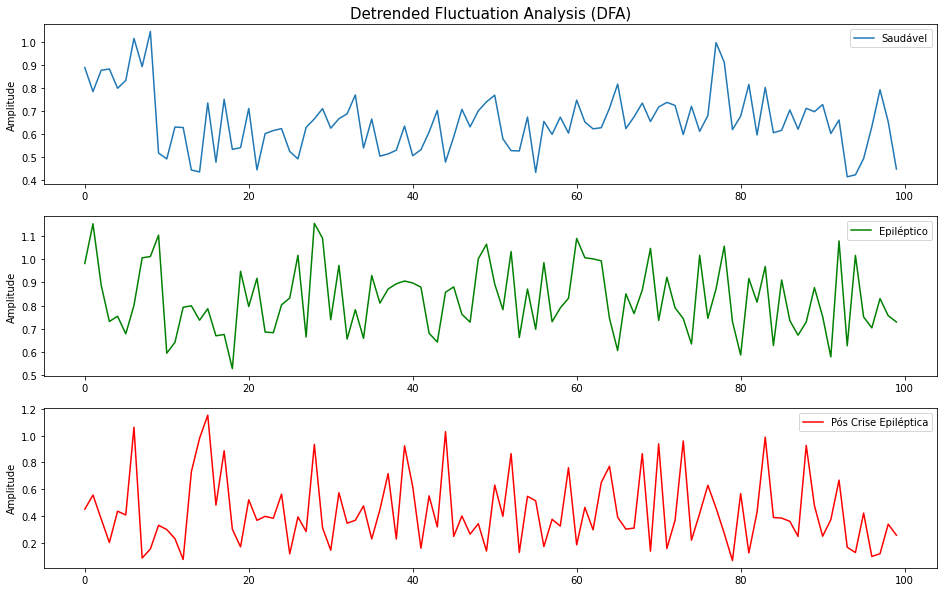

In [20]:
# Gráfico DFA (feature = f1)
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
plt.plot(x,FCM_B['f1'], label='Saudável')
plt.title('Detrended Fluctuation Analysis (DFA)', fontsize = 15)
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,FCM_D['f1'], 'g', label='Epiléptico')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,FCM_E['f1'], 'r', label='Pós Crise Epiléptica')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


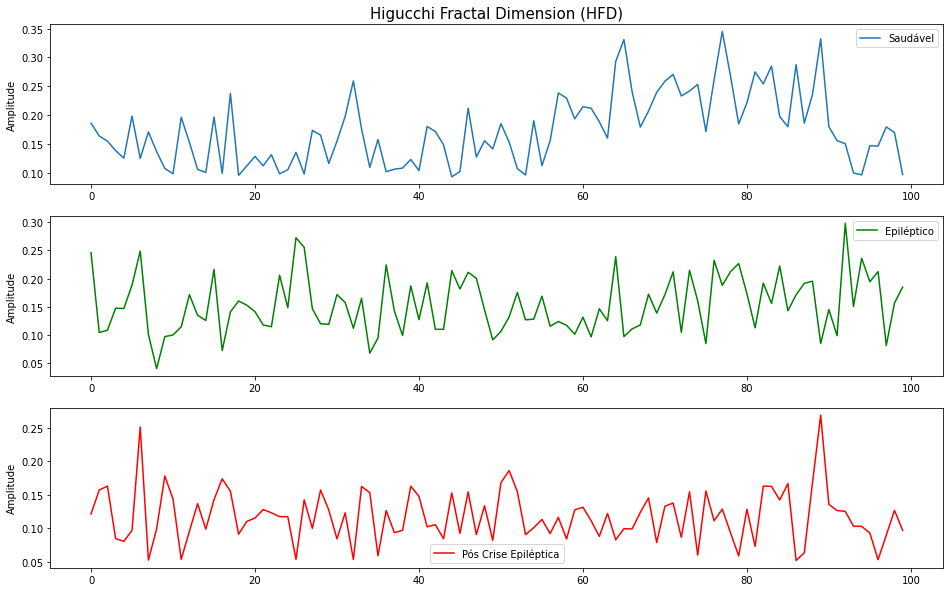

In [21]:
# Gráfico HFD (feature = f2)
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
plt.plot(x,FCM_B['f2'], label='Saudável')
plt.title('Higucchi Fractal Dimension (HFD)', fontsize=15)
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,FCM_D['f2'], 'g', label='Epiléptico')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,FCM_E['f2'], 'r', label='Pós Crise Epiléptica')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

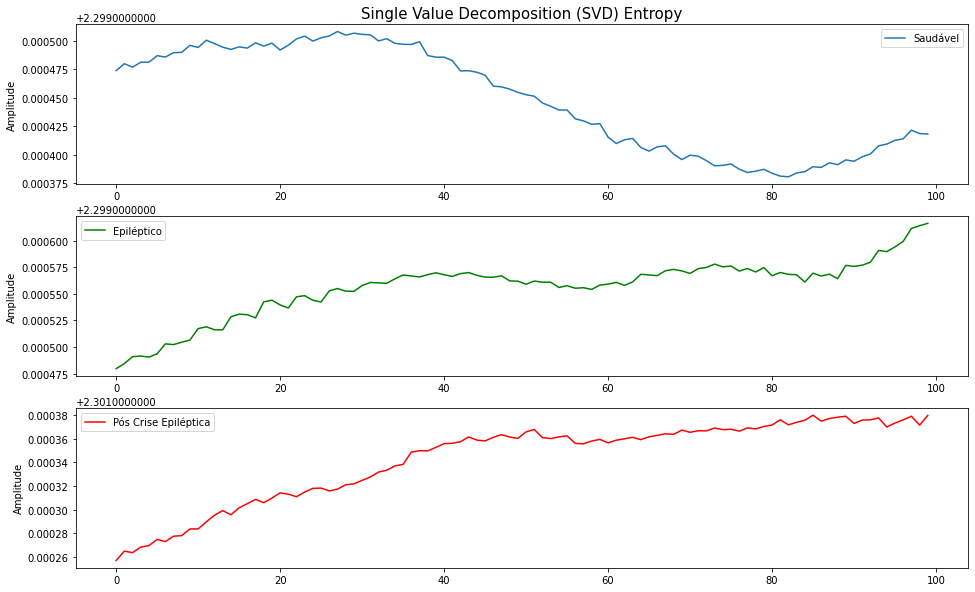

In [22]:
# Gráfico SVD (feature = f3)
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
plt.plot(x,FCM_B['f3'], label='Saudável')
plt.title('Single Value Decomposition (SVD) Entropy', fontsize=15)
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,FCM_D['f3'], 'g', label='Epiléptico')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,FCM_E['f3'], 'r', label='Pós Crise Epiléptica')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

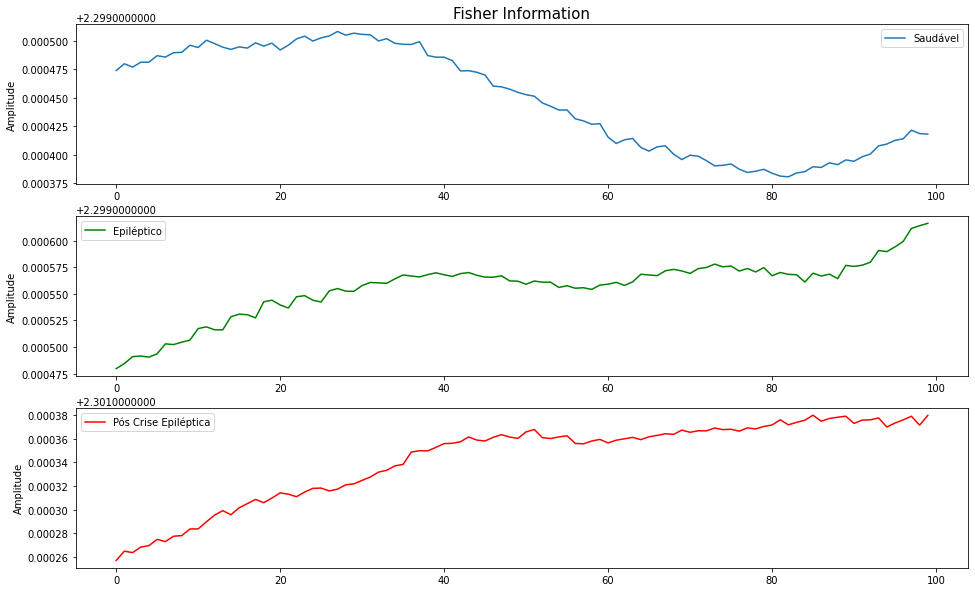

In [23]:
# Gráfico Fisher Information (feature = f4)
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
plt.plot(x,FCM_B['f4'], label='Saudável')
plt.title('Fisher Information', fontsize=15)
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,FCM_D['f4'], 'g', label='Epiléptico')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,FCM_E['f4'], 'r', label='Pós Crise Epiléptica')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

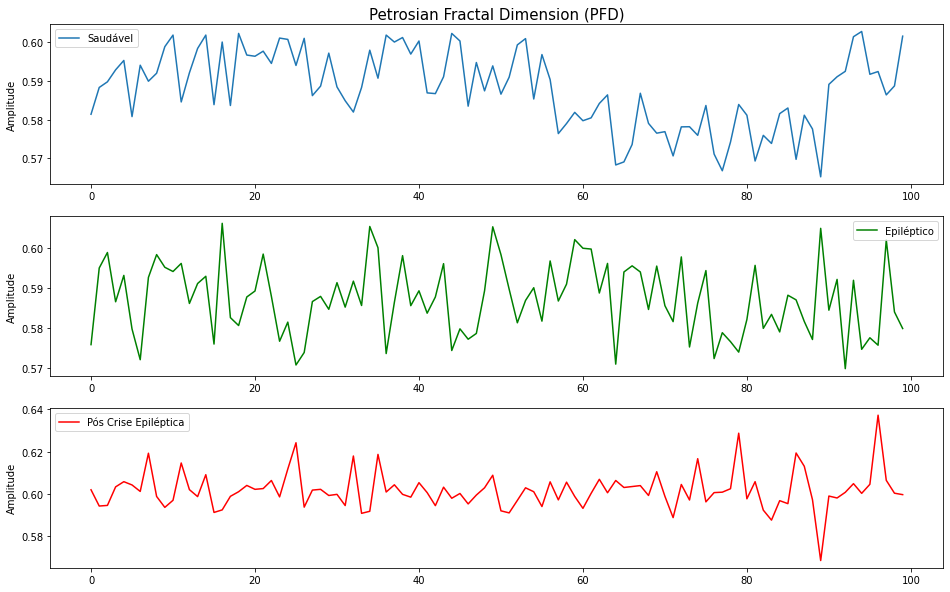

In [24]:
# Gráfico PFD (feature = f5)
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
plt.plot(x,FCM_B['f5'], label='Saudável')
plt.title('Petrosian Fractal Dimension (PFD)', fontsize=15)
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,FCM_D['f5'], 'g', label='Epiléptico')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,FCM_E['f5'], 'r', label='Pós Crise Epiléptica')
plt.ylabel('Amplitude')
plt.legend()
plt.show()